In [1]:
import torch
print(torch.__version__)

1.10.0+cu111


In [2]:
# Installation 참고 : https://mmcv.readthedocs.io/en/latest/get_started/installation.html
# https://github.com/open-mmlab/mmdetection/blob/master/docs/get_started.md
# The latest mmcv-full with CUDA 11.1 & PyTorch 1.10.0
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html

Looking in links: https://download.openmmlab.com/mmcv/dist/cu111/torch1.10.0/index.html
     |████████████████████████████████| 51.3 MB 119 kB/s 
     |████████████████████████████████| 185 kB 4.2 MB/s 


In [ ]:
!git clone https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

In [1]:
# 실행하기 전에 '런타임 다시 시작'으로 kenel을 restart
from mmdet.apis import init_detector, inference_detector
import mmcv

### MS-COCO 데이터로 사전 학습된 Faster RCNN를 활용하여 Inference 수행

참고 : https://github.com/open-mmlab/mmdetection/blob/master/demo/MMDet_Tutorial.ipynb

In [2]:
# pretrained weight 모델을 다운받을 경로 생성
!cd mmdetection; mkdir checkpoints

In [3]:
# https://github.com/open-mmlab/mmdetection/blob/master/configs/faster_rcnn/README.md 참고
# backbone으로 ResNet50, neck으로 FPN, epoch=12 / R-50-FPN pytorch의 model에 다운로드 링크 있음
# checkpoint경로에 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth로 저장
!wget -O /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth

--2021-11-15 07:03:33--  http://download.openmmlab.com/mmdetection/v2.0/faster_rcnn/faster_rcnn_r50_fpn_1x_coco/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth
Resolving download.openmmlab.com (download.openmmlab.com)... 47.75.20.5
Connecting to download.openmmlab.com (download.openmmlab.com)|47.75.20.5|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 167287506 (160M) [application/octet-stream]
Saving to: ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’

/content/mmdetectio 100%[===================>] 159.54M  11.6MB/s    in 14s     

2021-11-15 07:03:48 (11.4 MB/s) - ‘/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth’ saved [167287506/167287506]



In [4]:
!ls -lia /content/mmdetection/checkpoints

total 163376
5246325 drwxr-xr-x  2 root root      4096 Nov 15 07:03 .
5242882 drwxr-xr-x 19 root root      4096 Nov 15 07:03 ..
5246326 -rw-r--r--  1 root root 167287506 Nov  2 16:15 faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [5]:
# config, pretrained 모델을 기반으로 Inference를 수행할 모델을 생성. 
from mmdet.apis import init_detector, inference_detector

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'  # config
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'  # 다운로드 받은 pretrained model weight 

# Initialize the detector
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


**config_file**

![image](https://user-images.githubusercontent.com/44194558/141725303-4f47e6a6-2cae-4b71-89ba-7c72828becaf.png)

base : 서로 다른 모델들이 공통적으로 가지고 있는 config

<br/>

**configs/base/models/faster_rcnn/faster_rcnn_r50_fpn.py**

![image](https://user-images.githubusercontent.com/44194558/141725673-03b89e80-fbca-4836-b535-837dccd40a63.png)

추후에 num_classes 변경

In [6]:
%cd /content

/content


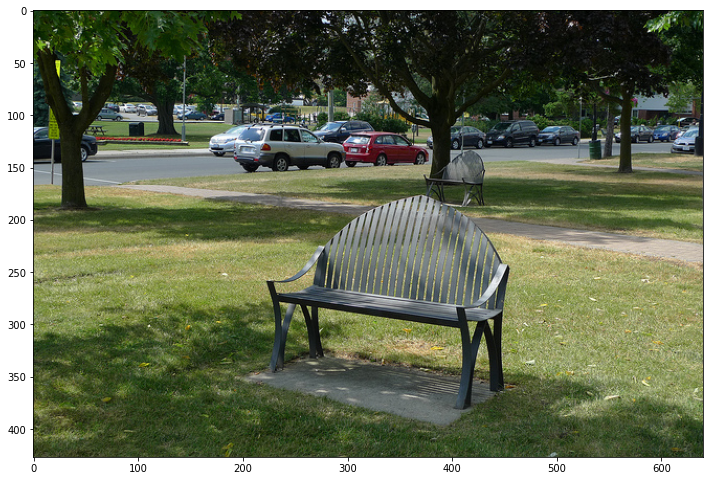

In [7]:
import cv2
import matplotlib.pyplot as plt

img = '/content/mmdetection/demo/demo.jpg'

img_arr  = cv2.cvtColor(cv2.imread(img), cv2.COLOR_BGR2RGB)
plt.figure(figsize=(12, 12))
plt.imshow(img_arr)

In [8]:
# 위의 이미지에 Inference 수행
results = inference_detector(model, img)

/usr/local/lib/python3.7/dist-packages/mmdet-2.18.0-py3.7.egg/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


In [9]:
type(results), len(results), results[0].shape

(list, 80, (3, 5))

Inference 수행 결과는 list 형식, 0~79까지 지정된 클래스 id별로 총 80개의 array (MS-COCO 데이터는 80개의 클래스 라벨을 가짐)

개별 array의 shape는 각 클래스 id에 해당하는 객체가 이미지에서 검출된 수, 5(xmin, ymin, xmax, ymax, confidence)

빈 array는 이미지에서 해당 id에 속하는 객체가 검출되지 않았다는 뜻

In [10]:
results[0]  # 0번 id에 속하는 객체는 이미지에서 3개 검출, 검출된 객체들의 좌표 및 confidence 정보

array([[3.75348572e+02, 1.19171005e+02, 3.81950867e+02, 1.34460617e+02,
        1.35454804e-01],
       [5.32362000e+02, 1.09554726e+02, 5.40526550e+02, 1.25222633e+02,
        8.88788104e-02],
       [3.61124298e+02, 1.09049202e+02, 3.68625610e+02, 1.22483063e+02,
        7.20716417e-02]], dtype=float32)

In [11]:
results[1]  # 검출 x

array([], shape=(0, 5), dtype=float32)

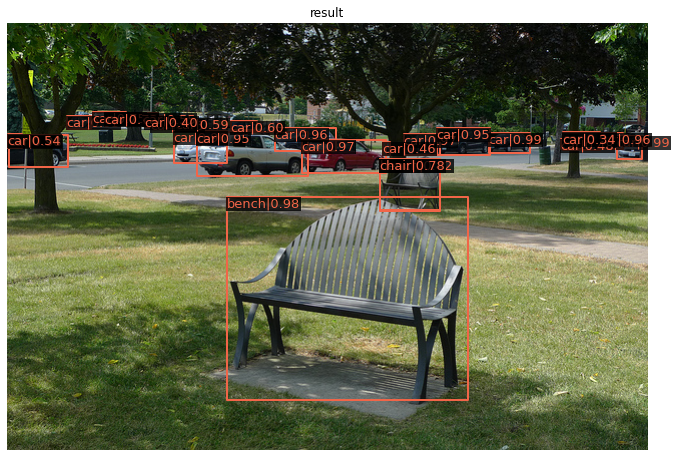

In [12]:
from mmdet.apis import show_result_pyplot

# ths의 default=0.3
show_result_pyplot(model, img, results)

### Model의 Config 설정 확인

In [ ]:
# 생성한 모델 객체의 다양한 변수 값 확인
model.__dict__

In [14]:
model.__dict__.keys()

dict_keys(['training', '_parameters', '_buffers', '_non_persistent_buffers_set', '_backward_hooks', '_is_full_backward_hook', '_forward_hooks', '_forward_pre_hooks', '_state_dict_hooks', '_load_state_dict_pre_hooks', '_modules', '_is_init', 'init_cfg', 'fp16_enabled', 'train_cfg', 'test_cfg', 'CLASSES', 'cfg'])

In [15]:
print(model.cfg.pretty_text)

model = dict(
    type='FasterRCNN',
    backbone=dict(
        type='ResNet',
        depth=50,
        num_stages=4,
        out_indices=(0, 1, 2, 3),
        frozen_stages=1,
        norm_cfg=dict(type='BN', requires_grad=True),
        norm_eval=True,
        style='pytorch',
        init_cfg=dict(type='Pretrained', checkpoint='torchvision://resnet50')),
    neck=dict(
        type='FPN',
        in_channels=[256, 512, 1024, 2048],
        out_channels=256,
        num_outs=5),
    rpn_head=dict(
        type='RPNHead',
        in_channels=256,
        feat_channels=256,
        anchor_generator=dict(
            type='AnchorGenerator',
            scales=[8],
            ratios=[0.5, 1.0, 2.0],
            strides=[4, 8, 16, 32, 64]),
        bbox_coder=dict(
            type='DeltaXYWHBBoxCoder',
            target_means=[0.0, 0.0, 0.0, 0.0],
            target_stds=[1.0, 1.0, 1.0, 1.0]),
        loss_cls=dict(
            type='CrossEntropyLoss', use_sigmoid=True, loss_weight=1.

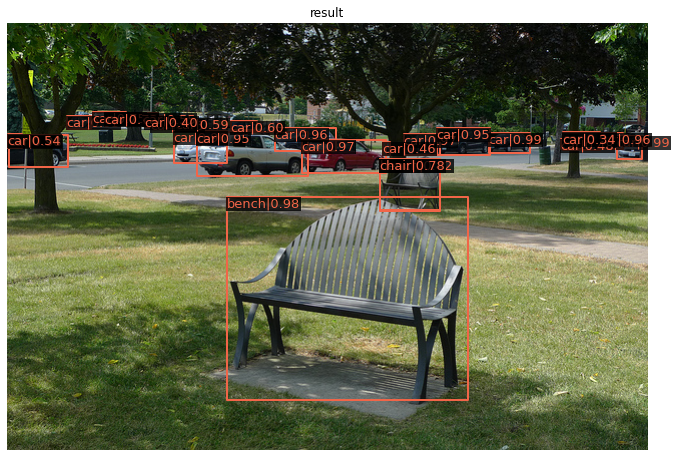

In [16]:
import cv2

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')  # RGB 변환 불필요
results = inference_detector(model, img_arr)

show_result_pyplot(model, img_arr, results)

### Inference 시각화용 함수

In [17]:
labels_to_names_seq = {0:'person',1:'bicycle',2:'car',3:'motorbike',4:'aeroplane',5:'bus',6:'train',7:'truck',8:'boat',9:'traffic light',10:'fire hydrant',
                        11:'stop sign',12:'parking meter',13:'bench',14:'bird',15:'cat',16:'dog',17:'horse',18:'sheep',19:'cow',20:'elephant',
                        21:'bear',22:'zebra',23:'giraffe',24:'backpack',25:'umbrella',26:'handbag',27:'tie',28:'suitcase',29:'frisbee',30:'skis',
                        31:'snowboard',32:'sports ball',33:'kite',34:'baseball bat',35:'baseball glove',36:'skateboard',37:'surfboard',38:'tennis racket',39:'bottle',40:'wine glass',
                        41:'cup',42:'fork',43:'knife',44:'spoon',45:'bowl',46:'banana',47:'apple',48:'sandwich',49:'orange',50:'broccoli',
                        51:'carrot',52:'hot dog',53:'pizza',54:'donut',55:'cake',56:'chair',57:'sofa',58:'pottedplant',59:'bed',60:'diningtable',
                        61:'toilet',62:'tvmonitor',63:'laptop',64:'mouse',65:'remote',66:'keyboard',67:'cell phone',68:'microwave',69:'oven',70:'toaster',
                        71:'sink',72:'refrigerator',73:'book',74:'clock',75:'vase',76:'scissors',77:'teddy bear',78:'hair drier',79:'toothbrush' }

labels_to_names = {1:'person',2:'bicycle',3:'car',4:'motorcycle',5:'airplane',6:'bus',7:'train',8:'truck',9:'boat',10:'traffic light',
                    11:'fire hydrant',12:'street sign',13:'stop sign',14:'parking meter',15:'bench',16:'bird',17:'cat',18:'dog',19:'horse',20:'sheep',
                    21:'cow',22:'elephant',23:'bear',24:'zebra',25:'giraffe',26:'hat',27:'backpack',28:'umbrella',29:'shoe',30:'eye glasses',
                    31:'handbag',32:'tie',33:'suitcase',34:'frisbee',35:'skis',36:'snowboard',37:'sports ball',38:'kite',39:'baseball bat',40:'baseball glove',
                    41:'skateboard',42:'surfboard',43:'tennis racket',44:'bottle',45:'plate',46:'wine glass',47:'cup',48:'fork',49:'knife',50:'spoon',
                    51:'bowl',52:'banana',53:'apple',54:'sandwich',55:'orange',56:'broccoli',57:'carrot',58:'hot dog',59:'pizza',60:'donut',
                    61:'cake',62:'chair',63:'couch',64:'potted plant',65:'bed',66:'mirror',67:'dining table',68:'window',69:'desk',70:'toilet',
                    71:'door',72:'tv',73:'laptop',74:'mouse',75:'remote',76:'keyboard',77:'cell phone',78:'microwave',79:'oven',80:'toaster',
                    81:'sink',82:'refrigerator',83:'blender',84:'book',85:'clock',86:'vase',87:'scissors',88:'teddy bear',89:'hair drier',90:'toothbrush',
                    91:'hair brush'}

In [18]:
import numpy as np

In [25]:
def get_detected_img(model, img_array,  score_threshold=0.3, is_print=True):
  
    draw_img = img_array.copy()  # 입력 image_array 복사
    bbox_color=(0, 255, 0)
    text_color=(0, 0, 255)
  
    # Inference 수행
    results = inference_detector(model, img_array)

    for result_ind, result in enumerate(results):
        # 해당 객체가 이미지에서 검출되지 않았다면
        if len(result) == 0:
            continue
      
        # array에서 confidence score가 지정된 ths보다 높은 요소만 추출
        result_filtered = result[np.where(result[:, 4] > score_threshold)]

        for i in range(len(result_filtered)):
            left = int(result_filtered[i, 0])  # xmin
            top = int(result_filtered[i, 1])  # ymin
            right = int(result_filtered[i, 2])  # xmax
            bottom = int(result_filtered[i, 3])  # ymax

            caption = "{}: {:.4f}".format(labels_to_names_seq[result_ind], result_filtered[i, 4])
            cv2.rectangle(draw_img, (left, top), (right, bottom), color=bbox_color, thickness=2)
            cv2.putText(draw_img, caption, (int(left), int(top - 7)), cv2.FONT_HERSHEY_SIMPLEX, 0.37, text_color, 1)

            if is_print:
                print(caption)

    return draw_img

car: 0.9888
car: 0.9872
car: 0.9832
car: 0.9713
car: 0.9678
car: 0.9594
car: 0.9593
car: 0.9568
car: 0.9510
car: 0.9459
car: 0.9440
car: 0.9331
car: 0.8663
car: 0.8268
car: 0.7535
car: 0.7166
car: 0.6008
car: 0.5920
car: 0.5540
car: 0.5435
car: 0.4768
car: 0.4612
car: 0.4010
car: 0.3439
bench: 0.9778
bench: 0.4170
chair: 0.7779


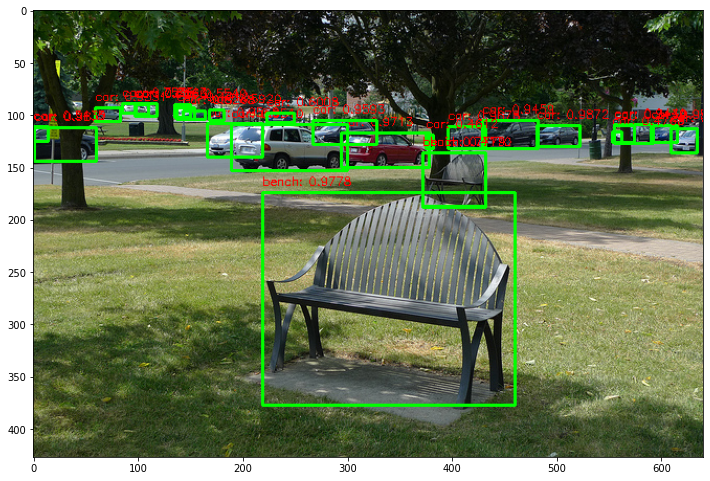

In [26]:
import matplotlib.pyplot as plt

img_arr = cv2.imread('/content/mmdetection/demo/demo.jpg')
detected_img = get_detected_img(model, img_arr,  score_threshold=0.3, is_print=True)
detected_img = cv2.cvtColor(detected_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(12, 12))
plt.imshow(detected_img)

### Video Inference

In [32]:
!mkdir data
!wget -O /content/data/John_Wick_small.mp4 https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true

--2021-11-15 07:08:18--  https://github.com/chulminkw/DLCV/blob/master/data/video/John_Wick_small.mp4?raw=true
Resolving github.com (github.com)... 52.192.72.89
Connecting to github.com (github.com)|52.192.72.89|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4 [following]
--2021-11-15 07:08:18--  https://github.com/chulminkw/DLCV/raw/master/data/video/John_Wick_small.mp4
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4 [following]
--2021-11-15 07:08:19--  https://raw.githubusercontent.com/chulminkw/DLCV/master/data/video/John_Wick_small.mp4
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.

In [33]:
from mmdet.apis import init_detector, inference_detector
import mmcv

config_file = '/content/mmdetection/configs/faster_rcnn/faster_rcnn_r50_fpn_1x_coco.py'
checkpoint_file = '/content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth'
model = init_detector(config_file, checkpoint_file, device='cuda:0')

load checkpoint from local path: /content/mmdetection/checkpoints/faster_rcnn_r50_fpn_1x_coco_20200130-047c8118.pth


In [34]:
# 참고 : https://github.com/open-mmlab/mmdetection/blob/master/demo/video_demo.py 
import cv2

video_reader = mmcv.VideoReader('/content/data/John_Wick_small.mp4')

video_writer = None
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
video_writer = cv2.VideoWriter('/content/data/John_Wick_small_out1.mp4', fourcc, video_reader.fps,(video_reader.width, video_reader.height))

for frame in mmcv.track_iter_progress(video_reader):
    result = inference_detector(model, frame)
    frame = model.show_result(frame, result, score_thr=0.4)

    video_writer.write(frame)

if video_writer:
    video_writer.release()

[                                                  ] 0/58, elapsed: 0s, ETA:

/usr/local/lib/python3.7/dist-packages/mmdet-2.18.0-py3.7.egg/mmdet/datasets/utils.py:69: UserWarning: "ImageToTensor" pipeline is replaced by "DefaultFormatBundle" for batch inference. It is recommended to manually replace it in the test data pipeline in your config file.
  'data pipeline in your config file.', UserWarning)


[>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>>] 58/58, 3.7 task/s, elapsed: 16s, ETA:     0s


In [39]:
import time

def do_detected_video(model, input_path, output_path, score_threshold, do_print=True):
    
    cap = cv2.VideoCapture(input_path)

    codec = cv2.VideoWriter_fourcc(*'XVID')
    vid_size = (round(cap.get(cv2.CAP_PROP_FRAME_WIDTH)), round(cap.get(cv2.CAP_PROP_FRAME_HEIGHT)))
    vid_fps = cap.get(cv2.CAP_PROP_FPS)

    vid_writer = cv2.VideoWriter(output_path, codec, vid_fps, vid_size) 

    frame_cnt = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    print('총 Frame 갯수:', frame_cnt)

    btime = time.time()
    while True:
        # 동영상 파일을 frame 단위로 불러오기
        hasFrame, img_frame = cap.read()
        if not hasFrame:
            print('더 이상 처리할 frame이 없습니다')
            break
        stime = time.time()
        # 동영상의 이미지 frame에 대해 object detection 수행
        img_frame = get_detected_img(model, img_frame, score_threshold=score_threshold, is_print=False)
        if do_print:
            print('frame별 detection 수행 시간:', round(time.time() - stime, 4))
        # detection 결과 반영     
        vid_writer.write(img_frame)

    vid_writer.release()
    cap.release()

    print('최종 detection 완료 수행 시간:', round(time.time() - btime, 4))        

In [40]:
do_detected_video(model, '/content/data/John_Wick_small.mp4', '/content/data/John_Wick_small_out2.mp4', score_threshold=0.4, do_print=True)

총 Frame 갯수: 58
frame별 detection 수행 시간: 0.0926
frame별 detection 수행 시간: 0.0901
frame별 detection 수행 시간: 0.0859
frame별 detection 수행 시간: 0.0909
frame별 detection 수행 시간: 0.0903
frame별 detection 수행 시간: 0.0849
frame별 detection 수행 시간: 0.0852
frame별 detection 수행 시간: 0.0881
frame별 detection 수행 시간: 0.0821
frame별 detection 수행 시간: 0.0853
frame별 detection 수행 시간: 0.0863
frame별 detection 수행 시간: 0.0834
frame별 detection 수행 시간: 0.0864
frame별 detection 수행 시간: 0.0894
frame별 detection 수행 시간: 0.087
frame별 detection 수행 시간: 0.0852
frame별 detection 수행 시간: 0.0894
frame별 detection 수행 시간: 0.0848
frame별 detection 수행 시간: 0.09
frame별 detection 수행 시간: 0.089
frame별 detection 수행 시간: 0.085
frame별 detection 수행 시간: 0.0872
frame별 detection 수행 시간: 0.0891
frame별 detection 수행 시간: 0.0874
frame별 detection 수행 시간: 0.0896
frame별 detection 수행 시간: 0.0879
frame별 detection 수행 시간: 0.0876
frame별 detection 수행 시간: 0.085
frame별 detection 수행 시간: 0.0872
frame별 detection 수행 시간: 0.0846
frame별 detection 수행 시간: 0.0842
frame별 detection 수행 시간: 0.0919